In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# UPLOAD DATASET

In [2]:
data = pd.read_csv("tyres_train.csv", sep = ",")

data.head(30)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,63.6,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,NaN,0,0


# DATA OBSERVATION E PREPARATION

In [3]:
data.dtypes

vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
diameter           float64
add_layers           int64
failure              int64
dtype: object

In [4]:
data.isnull().sum()
# the variable "diameter" is almost void --> impossible to proceed with substitution

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

In [5]:
#dropping all column "diameter"
d="diameter"
data_dropped = data.drop(columns=d)

data_dropped.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,1,0


In [7]:
data_dropped.isnull().sum()
# no more NaN observations

vulc               0
perc_nat_rubber    0
wiring_strength    0
weather            0
perc_imp           0
temperature        0
tread_type         0
tyre_season        0
elevation          0
month              0
tread_depth        0
tyre_quality       0
perc_exp_comp      0
add_layers         0
failure            0
dtype: int64

In [8]:
selection_categorical=['tread_type', 'tyre_season', 'month', 'tread_depth', 'wiring_strength', 'tyre_quality',
       'add_layers']
data_categorical=data_dropped[selection_categorical]
data_categorical.head()

,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality,add_layers
0,0,1,8,0,1,1,1
1,2,0,11,1,1,0,1
2,0,0,0,1,1,0,1
3,1,0,7,3,1,1,1
4,0,1,2,2,2,0,1


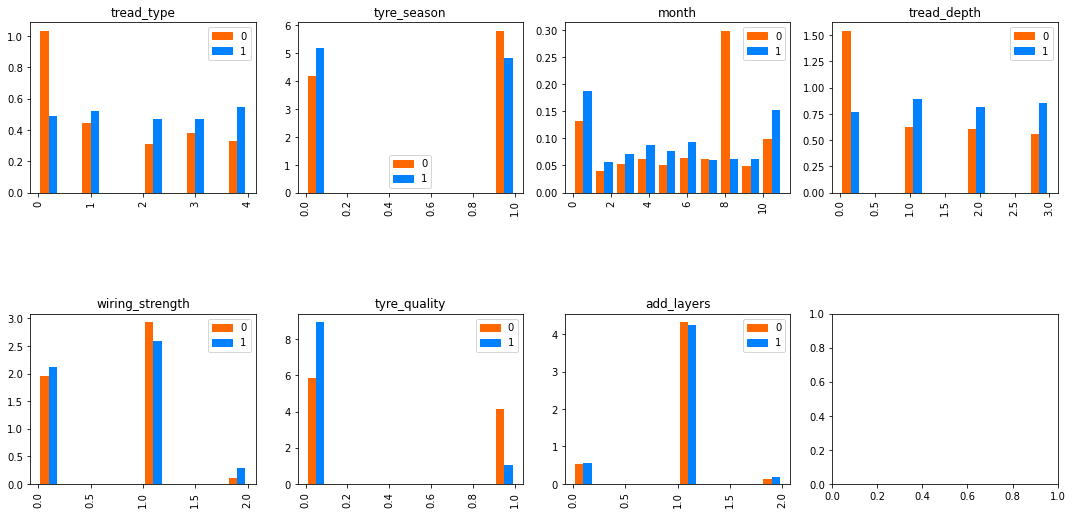

In [10]:
from matplotlib.patches import Rectangle

data_0=data_categorical[data_dropped['failure']==0] # records wih target==0
data_1=data_categorical[data_dropped['failure']==1] # records wih target==1

cmap = plt.get_cmap('jet')
col=[cmap(0.8),cmap(0.25)]
fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in data_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([data_0[x],data_1[x]],density=True,color=col)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    handles = [Rectangle((0,0),1,1,color=c)for c in col]
    labels= ["0","1"]
    plt.legend(handles, labels)
    i+=1
plt.show()

In [181]:
# create dummies with the OneHotEncoder method

In [11]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder(handle_unknown='ignore')

data_dummies=pd.DataFrame()
for i in range(len(selection_categorical)):
    encod.fit(data_dropped[[selection_categorical[i]]].astype(str))
    dummies = encod.transform(data_dropped[[selection_categorical[i]]].astype(str)).toarray()
    for k in range(len(encod.categories_[0])):
        encod.categories_[0][k]=selection_categorical[i]+"_"+str(encod.categories_[0][k])
    data_dummies=pd.concat([data_dummies,pd.DataFrame(dummies,columns=encod.categories_[0])],axis=1)
    
data_dummies.head()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1,add_layers_0,add_layers_1,add_layers_2
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [12]:
selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation',
       'perc_exp_comp','failure']
data_numerical=data_dropped[selection_numerical]
data_numerical.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,17.990,26,0.16,0.01,-8.12,332.5,5.13,0
1,20.704,36,0.30,0.01,-4.52,328.0,6.15,0
2,19.156,34,0.30,0.01,-1.08,247.0,6.36,0
3,16.802,35,0.19,0.02,7.44,408.0,6.62,0
4,17.140,23,0.39,0.01,30.52,308.0,6.15,0


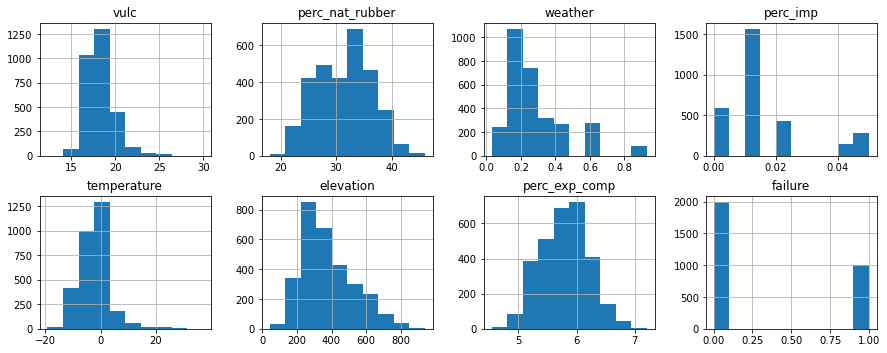

In [13]:
data_hist=data_numerical.hist(layout=(4,4), figsize=(15,12))
# we can try to normalize vulc, temperature and elevation

In [14]:
import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

data_numerical['logvulc']=data_numerical['vulc'].apply(lambda x: math.log(x+1))
data_numerical['logtemp']=data_numerical['temperature'].apply(lambda x: math.log(x+20)) #translate negative values
data_numerical['logelev']=data_numerical['elevation'].apply(lambda x: math.log(x+1))

selection_numerical_log=["logvulc", "perc_nat_rubber", "weather", "perc_imp", "logtemp", "logelev",
       "perc_exp_comp","failure"]
data_numerical_log=data_numerical[selection_numerical_log]
data_numerical_2=data_numerical[selection_numerical]


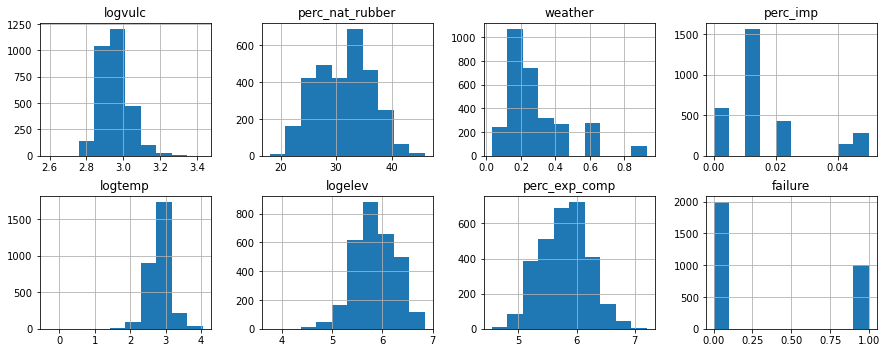

In [15]:
data_hist=data_numerical_log.hist(layout=(4,4), figsize=(15,12))

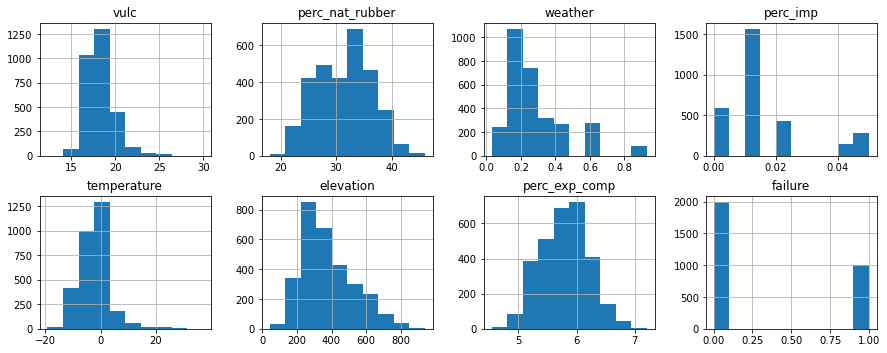

In [16]:
data_hist=data_numerical_2.hist(layout=(4,4), figsize=(15,12))

we can chose what kind of data we prefer to use --> better log version beacuse in more symmetric (vulc doesn't change a lot)

In [17]:
select=["vulc", "perc_nat_rubber", "weather", "perc_imp", "logtemp", "logelev",
       "perc_exp_comp","failure"]
data_chosen= data_numerical[select]

<AxesSubplot:>

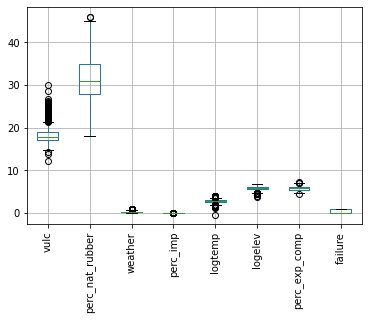

In [18]:
data_chosen.boxplot(rot=90)
# the scale of numerical variables is too different

In [19]:
from sklearn.preprocessing import StandardScaler

independent_variables=data_chosen.iloc[:,:-1] #no target

scaler = StandardScaler().fit(independent_variables) 
scaled_data = pd.DataFrame(scaler.transform(independent_variables))
scaled_data.columns = independent_variables.columns



<AxesSubplot:>

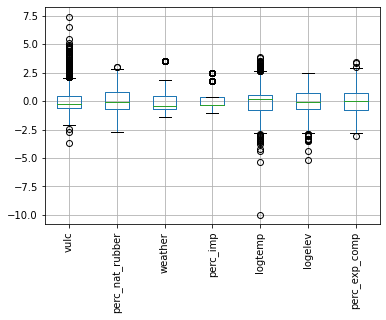

In [20]:
scaled_data.boxplot(rot=90)

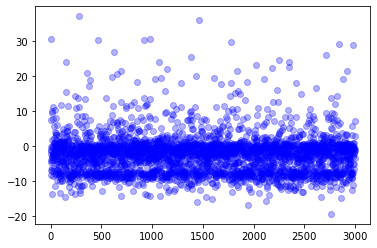

In [21]:
plt.scatter(range(3000),data_dropped["temperature"],alpha=.3,c='blue')

In [85]:
# Create final dataset with all modifications and target variable included


df=pd.concat([data_dummies,scaled_data],axis=1)

df['failure']=data_dropped['failure']

df.tail()


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,add_layers_1,add_layers_2,vulc,perc_nat_rubber,weather,perc_imp,logtemp,logelev,perc_exp_comp,failure
2995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,-0.231083,-0.456093,0.584065,-0.319087,1.536932,-0.462821,-0.271809,1
2996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-0.698653,-0.253355,-0.343773,-1.020379,0.317454,-2.016652,0.045070,1
2997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.269567,0.354859,0.584065,-0.319087,-0.043561,-0.957449,-0.539937,0
2998,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.433093,1.165810,-1.380768,-1.020379,0.431385,-0.441574,0.240072,0
2999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.315301,0.354859,-1.217032,-1.020379,0.968922,0.378516,0.508200,0


# MODELS

## Separate train/test set

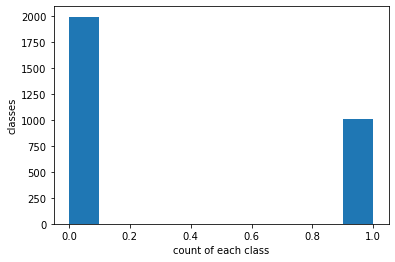

0    1992
1    1008
Name: failure, dtype: int64

In [86]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#Visualize Class Counts
plt.hist(y)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
df.failure.value_counts()
# the dataset is umbalanced --> we perform oversampling on the class 1 (oversampling because we have too little rows)

In [95]:
from sklearn.utils import resample

df_majority = df[df.failure==0]
df_minority = df[df.failure==1] 
 
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=1992,     
                                   random_state=123)  

df_oversampled = pd.concat([df_minority_oversampled, df_majority])

df_oversampled.failure.value_counts()

1    1992
0    1992
Name: failure, dtype: int64

In [96]:
#Separate X and y on the new DataFrame
X = df_oversampled.iloc[:,0:-1]
y = df_oversampled.iloc[:,-1]

#X.head()
#y.head()

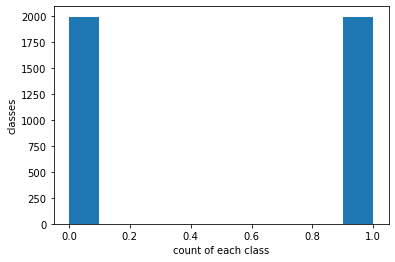

0    1992
1    1008
Name: failure, dtype: int64

In [26]:
plt.hist(y)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
df.failure.value_counts()

In [97]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target proportions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(2788, 38) (1196, 38)


## Funzione per iperparametri


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [29]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred)))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

## Curva ROC

In [30]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## TREE

In [98]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [3,4,5,6,8,10],
              'min_samples_split': [5,10,15,20],
              'min_samples_leaf': [10,15,20]}

hyperp_search(classifier,parameters)

f1_train: 0.746311 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 5}
f1         train 0.743   test 0.716
precision  train 0.727   test 0.699

[[409 189]
 [159 439]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       598
           1       0.70      0.73      0.72       598

    accuracy                           0.71      1196
   macro avg       0.71      0.71      0.71      1196
weighted avg       0.71      0.71      0.71      1196



In [90]:
model_Tree= DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 20, min_samples_split= 5)

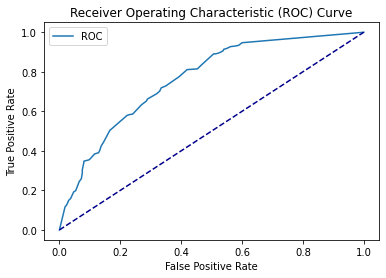

AUC: 0.76


In [91]:
#curva ROC
fpr1,tpr1=roc(model_Tree,X_train,y_train,X_test,y_test)

## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,10)}

In [93]:
hyperp_search(classifier,parameters)

f1_train: 0.557206 using {'n_neighbors': 30}
f1         train 0.597   test 0.515
precision  train 0.752   test 0.648

[[528  70]
 [173 129]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       598
           1       0.65      0.43      0.51       302

    accuracy                           0.73       900
   macro avg       0.70      0.66      0.66       900
weighted avg       0.72      0.73      0.71       900



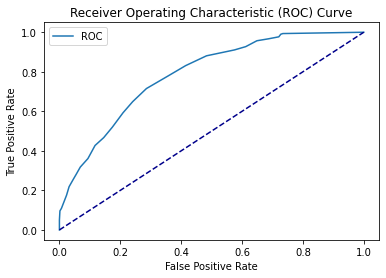

AUC: 0.79


In [94]:
model_knn = KNeighborsClassifier(n_neighbors=30)

#curva ROC
fpr2,tpr2=roc(model_knn,X_train,y_train,X_test,y_test)

## NAYVE BAYES

In [67]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.703894195444526
f1_test:  0.703894195444526
[[314 284]
 [119 479]]
              precision    recall  f1-score   support

           0       0.73      0.53      0.61       598
           1       0.63      0.80      0.70       598

    accuracy                           0.66      1196
   macro avg       0.68      0.66      0.66      1196
weighted avg       0.68      0.66      0.66      1196



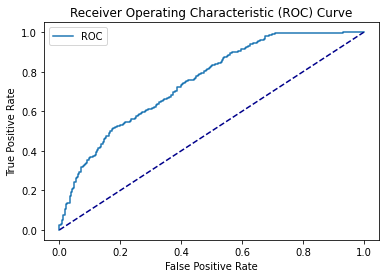

AUC: 0.75


In [68]:
fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

## LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "penalty":['l2','none'], "max_iter":[500,1000,10000] }


hyperp_search(classifier,parameters)

f1_train: 0.732409 using {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}
f1         train 0.737   test 0.727
precision  train 0.716   test 0.708

[[414 184]
 [151 447]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       598
           1       0.71      0.75      0.73       598

    accuracy                           0.72      1196
   macro avg       0.72      0.72      0.72      1196
weighted avg       0.72      0.72      0.72      1196



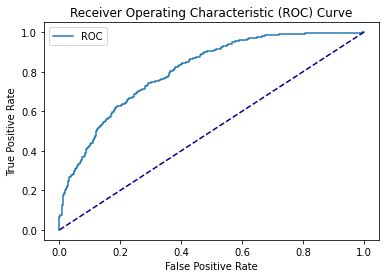

AUC: 0.81


In [71]:
model_Log = LogisticRegression(C=0.1, max_iter=500)

fpr4,tpr4=roc(model_Log,X_train,y_train,X_test,y_test)

## SVM
--> pay attention: it takes a long time to run

In [103]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.01,0.1,1]}

hyperp_search(classifier,parameters)

f1_train: 0.745711 using {'C': 1, 'kernel': 'rbf'}
f1         train 0.829   test 0.764
precision  train 0.806   test 0.735

[[427 171]
 [123 475]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       598
           1       0.74      0.79      0.76       598

    accuracy                           0.75      1196
   macro avg       0.76      0.75      0.75      1196
weighted avg       0.76      0.75      0.75      1196



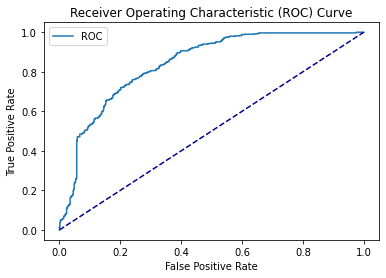

AUC: 0.84


In [100]:
model = SVC(C=1, kernel='rbf',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

## NEURAL NETWORK

In [107]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5,3,2),(5,3),(10, 5)],  "max_iter": [1000,2000,5000,10000], "alpha": [0.001,0.1,10]}

hyperp_search(classifier,parameters)

f1_train: 0.768521 using {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'max_iter': 5000}
f1         train 0.868   test 0.761
precision  train 0.840   test 0.726

[[418 180]
 [120 478]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       598
           1       0.73      0.80      0.76       598

    accuracy                           0.75      1196
   macro avg       0.75      0.75      0.75      1196
weighted avg       0.75      0.75      0.75      1196



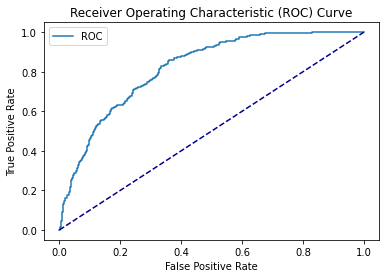

AUC: 0.82


In [109]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.001, max_iter=5000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

# CHOICE OF THE MODEL

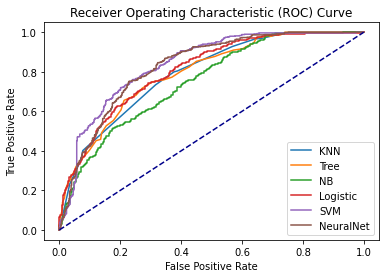

In [84]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# PREDICTIONS

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()